## Доверительные интервалы. Распределение Бернулли с неизвестной вероятностью успеха

**Задача.** Пусть дана выборка из распределения Бернулли (можно считать, например, это это клики по рекламному баннеру в Интернете) длины $n=290$ и вероятностью успеха, равномерно распределенной на $[0.01,0.05]$. Оценить параметр успеха. Построить для него доверительные интервалы: (1) асимптотический, основанный на центральной предельной теореме, (2) доверительный интервал Уилсона. 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np # для генерации случайных величин и работы с массивами
import statsmodels.stats.proportion # для построения доверительных интервалов в модели Бернулли 

In [2]:
np.random.seed(123) # фиксируем seed

In [3]:
# Фиксируем параметры задачи

n = 290 # размер выборки 
alpha = 0.05 # параметр ошибки

p = np.random.uniform(0.01,0.05) # неизвестный параметр успеха
p = 1/3

In [4]:
# Сгенерируем выборку из нужного распределения
sample = np.random.binomial(1,p, size=n)
sample = np.array([1,2,3,3,3,2,2,2,2,2,1,3,1,1,3,3,1,2])

In [5]:
sample

array([1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2])

In [6]:
sample[sample==1]

array([1, 1, 1, 1, 1])

In [7]:
print("Истинное значение параметра: ",p)
print("Оценка вероятности успеха: ",len(sample[sample==1])/len(sample))

Истинное значение параметра:  0.3333333333333333
Оценка вероятности успеха:  0.2777777777777778


Для того, чтобы построить доверительный интервал в модели Бернулли, можно воспользоваться методом proportion_confint  класса statsmodels.stats.proportion. Подробнее можно прочитать тут: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html

В целом, про доверительные интервалы в модели Бернулли можно почитать либо в английской Википедии: 
https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval  
либо в этой статье:  
http://medstatistic.ru/articles/doveritelnye-intervaly-dlya-chastot-i-doley.pdf

In [8]:
CI_Normal = statsmodels.stats.proportion.proportion_confint(sum(sample), n, alpha, method = 'normal')
print("Асимптотический доверительный интервал на основе ЦПТ равен ", CI_Normal)

Асимптотический доверительный интервал на основе ЦПТ равен  (0.08918788749558314, 0.1659845262975203)


In [9]:
CI_Wilson = statsmodels.stats.proportion.proportion_confint(len(sample[sample==1]), len(sample), alpha, method = 'wilson')
print("Доверительный интервал 1 Уилсона равен ", CI_Wilson)

Доверительный интервал 1 Уилсона равен  (0.12499753379553993, 0.5087265656029747)


In [10]:
CI_Wilson2 = statsmodels.stats.proportion.proportion_confint(len(sample[sample==2]), len(sample), alpha, method = 'wilson')
print("Доверительный интервал 2 Уилсона равен ", CI_Wilson2)

Доверительный интервал 2 Уилсона равен  (0.20305246572163624, 0.6138095839776211)


In [11]:
CI_Wilson = statsmodels.stats.proportion.proportion_confint(len(sample[sample==3]), len(sample), alpha, method = 'wilson')
print("Доверительный интервал 2 Уилсона равен ", CI_Wilson)

Доверительный интервал 2 Уилсона равен  (0.1627877475083369, 0.562505327040549)


In [12]:
from statsmodels.stats.proportion import samplesize_confint_proportion
sufficient_size = int(np.ceil(samplesize_confint_proportion(1/3, 0.005))) 
sufficient_size

34147

In [13]:
from scipy.stats import chisquare, randint
chisquare(sample)[1]

0.996695588095955

In [14]:

chisquare(randint.rvs(1, 4, size=1300))[1]
s2= randint.rvs(1, 4, size=1300)

In [15]:
CI_Wilson = statsmodels.stats.proportion.proportion_confint(len(s2[s2==3]), len(s2), alpha, method = 'wilson')
print("Доверительный интервал 2 Уилсона равен ", CI_Wilson)

Доверительный интервал 2 Уилсона равен  (0.33133634537874906, 0.38335289273117507)


In [16]:
from scipy import stats

stats.binom_test(len(sample[sample==2]), len(sample), 1/3, alternative = 'two-sided')

0.6225620374971963

In [17]:
stats.binom_test(len(sample[sample==1]), len(sample), 1/3, alternative = 'two-sided')

0.8037322594985424

In [18]:
stats.binom_test(len(sample[sample==3]), len(sample), 1/3, alternative = 'two-sided')

1.0

In [19]:
len(sample)

18

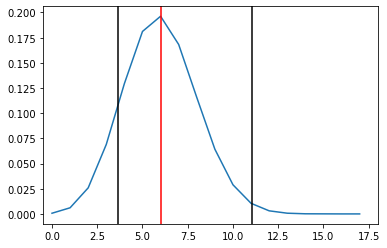

In [20]:

n = len(sample)
F_H0 = stats.binom(n, 1/3)

x = [int(i) for i in np.linspace(0,n-1,1000)]

plt.plot(x, F_H0.pmf(x))
plt.xlim(-0.5, n) 
plt.axvline(x=n/3, c='red')
plt.axvline(x=CI_Wilson2[0]*n, c='black')
plt.axvline(x=CI_Wilson2[1]*n, c='black')

plt.show()